In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('E:\\FYP_SourceCode\\AddisAbaba_AccidentsDataset\\RTA_Dataset.csv')

In [3]:
#display the shape of road accidents dataset in form of tuple (number of rows, number of columns)
#the dataset has 12316 observations and 32 columns
data.shape

(12316, 32)

In [4]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

# Exploratory Data Analysis


In [6]:
#Generate summary of descriptive statistical for all the numeric columns only and transpose it 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


## Skewness of Data

In [7]:
#Show the unbiased skew
skew = data.skew()
print(skew)

Number_of_vehicles_involved    1.323454
Number_of_casualties           2.344769
dtype: float64


## Number of Casualties by Drivers' sex

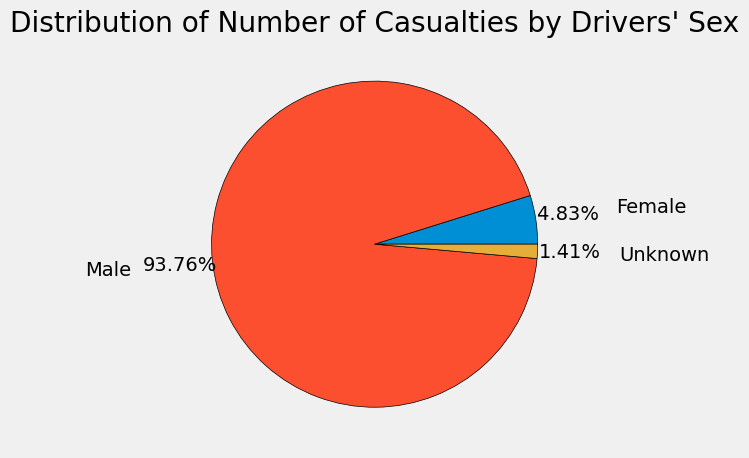

In [8]:
#generate a pie chart for displaying the number of casualties by drives's sex 
number_of_casualties_by_sex_of_driver = data.groupby(['Sex_of_driver'])[['Sex_of_driver', 'Number_of_casualties']].sum()
slices = number_of_casualties_by_sex_of_driver['Number_of_casualties']
labels = number_of_casualties_by_sex_of_driver.index

plt.style.use('fivethirtyeight')
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, autopct='%1.2f%%', pctdistance=1.2, labeldistance=1.5)
plt.title("Distribution of Number of Casualties by Drivers' Sex")
plt.tight_layout()

## Number of Casualties by Severity of Accidents

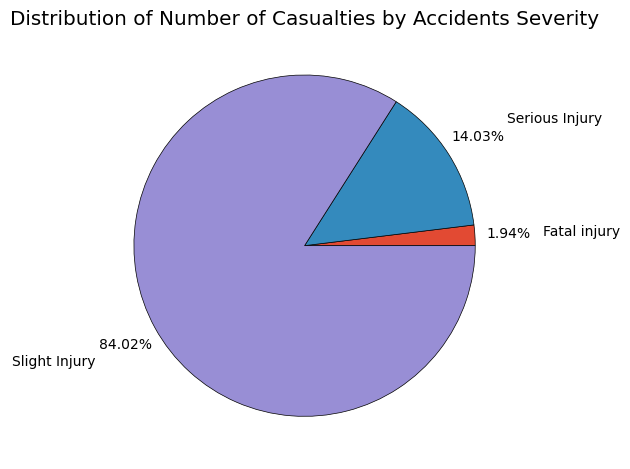

In [9]:
#generate a pie chart for displaying the number of casualties by severity of accidents
number_of_casualties_by_accident_severity = data.groupby(['Accident_severity'])[['Accident_severity', 'Number_of_casualties']].sum()
slices = number_of_casualties_by_accident_severity['Number_of_casualties']
labels = number_of_casualties_by_accident_severity.index

plt.style.use('ggplot')
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, autopct='%1.2f%%', pctdistance=1.2, labeldistance=1.4)
plt.title("Distribution of Number of Casualties by Accidents Severity")
plt.tight_layout()

## Distribution of Causes of Accidents

<BarContainer object of 20 artists>

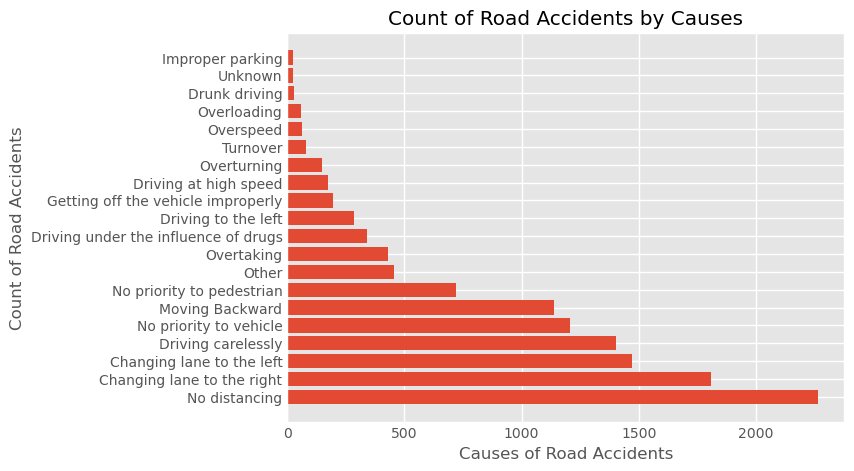

In [10]:
#generate horizontal bar chart for displaying the count of road accidents for each causes
count_of_road_accidents_by_causes = data['Cause_of_accident'].value_counts()
count_of_road_accidents = count_of_road_accidents_by_causes.values
causes_of_accidents = count_of_road_accidents_by_causes.index


plt.title('Count of Road Accidents by Causes')
plt.xlabel('Causes of Road Accidents')
plt.ylabel('Count of Road Accidents')
plt.style.use('ggplot')
plt.barh(causes_of_accidents, count_of_road_accidents)

## Frequency of Road Accidents by Day of Week

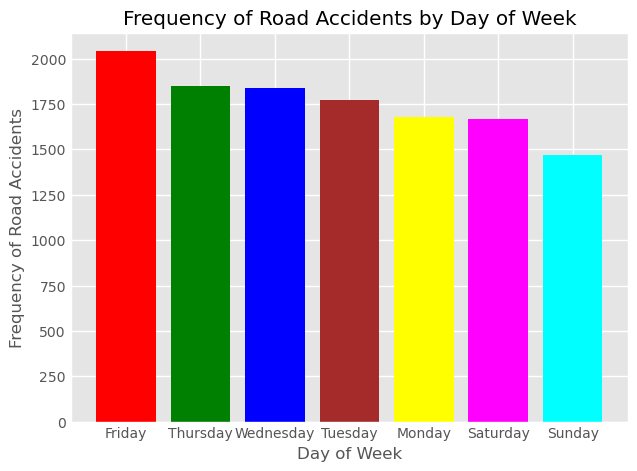

In [11]:
#generate a bar chart for displaying the frequency of road accidents by day of week
road_accidents_frequency_by_day = data['Day_of_week'].value_counts()
day_of_week = road_accidents_frequency_by_day.index

plt.bar(day_of_week, road_accidents_frequency_by_day, color=['red', 'green', 'blue', 'brown', 'yellow', 'magenta', 'cyan'])
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Road Accidents')
plt.title('Frequency of Road Accidents by Day of Week')
plt.style.use('fivethirtyeight')

## Frequency of Road Accidents by Drivers' Educational Level 

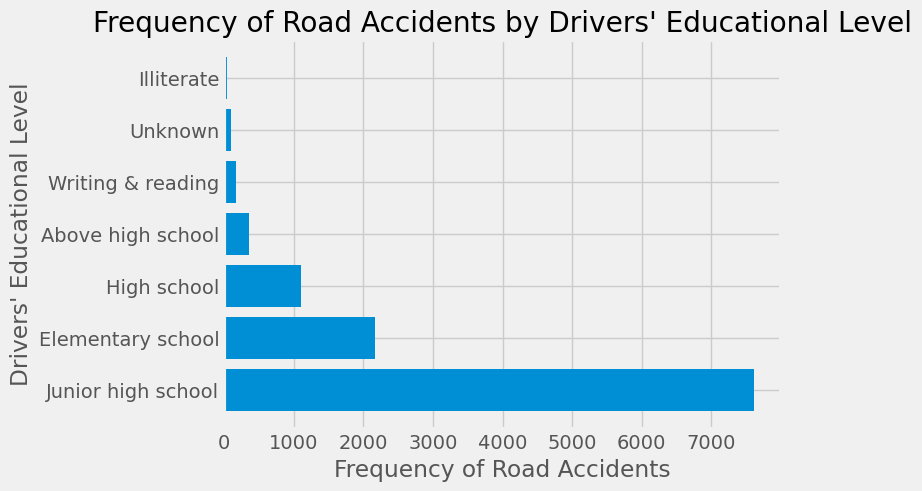

In [12]:
#generate a bar chart for displaying the frequency of road accidents by drivers' educational level
road_accidents_frequency_by_educational_level = data['Educational_level'].value_counts()
educational_level = road_accidents_frequency_by_educational_level.index

plt.barh(educational_level, road_accidents_frequency_by_educational_level)
plt.ylabel("Drivers' Educational Level")
plt.xlabel('Frequency of Road Accidents')
plt.title("Frequency of Road Accidents by Drivers' Educational Level")
plt.style.use('ggplot')

## Frequency of Road Accidents by Relationship between vechicles and drivers

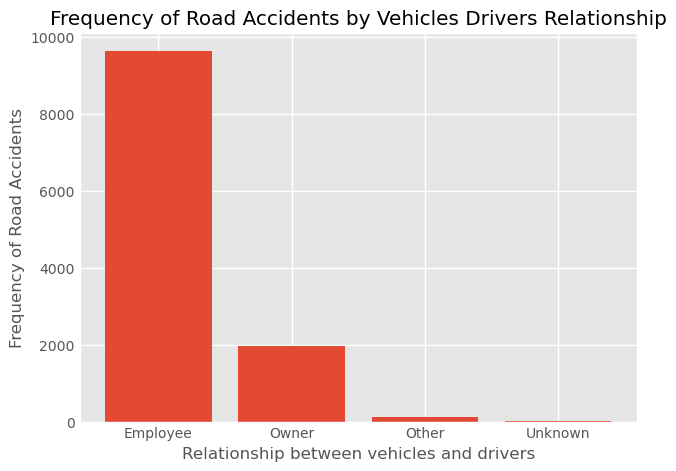

In [13]:
#generate a bar chart for displaying the frequency of road accidents by drivers' educational level
road_accidents_frequency_by_vehicles_drivers_relationship = data['Vehicle_driver_relation'].value_counts()
vehicles_drivers_relationship = road_accidents_frequency_by_vehicles_drivers_relationship.index

plt.bar(vehicles_drivers_relationship, road_accidents_frequency_by_vehicles_drivers_relationship)
plt.xlabel("Relationship between vehicles and drivers")
plt.ylabel('Frequency of Road Accidents')
plt.title("Frequency of Road Accidents by Vehicles Drivers Relationship")
plt.style.use('ggplot')
# plt.legend(vehicles_drivers_relationship)

In [14]:
#generate a pie chart for displaying the number of casualties by severity of accidents
number_of_casualties_by_accident_severity = data.groupby(['Accident_severity'])[['Number_of_casualties']].sum()
print(number_of_casualties_by_accident_severity)
number_of_casualties_by_accident_severity.index

# plt.style.use('ggplot')
# plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, autopct='%1.2f%%', pctdistance=1.2, labeldistance=1.4)
# plt.title("Distribution of Number of Casualties by Accidents Severity")
# plt.tight_layout()

                   Number_of_casualties
Accident_severity                      
Fatal injury                        370
Serious Injury                     2676
Slight Injury                     16021


Index(['Fatal injury', 'Serious Injury', 'Slight Injury'], dtype='object', name='Accident_severity')

In [15]:
df = pd.read_csv('E:\\FYP_SourceCode\\AddisAbaba_AccidentsDataset\\RTA_Dataset.csv')

In [17]:
#display the shape of road accidents dataset in form of tuple (number of rows, number of columns)
#the dataset has 12316 observations and 32 columns
df.shape

(12316, 32)

In [19]:
#return the first 5 rows of imported road accidents' dataframe
df.head(n=5).T

,0,1,2,3,4
Time,17:02:00,17:02:00,17:02:00,1:06:00,1:06:00
Day_of_week,Monday,Monday,Monday,Sunday,Sunday
Age_band_of_driver,18-30,31-50,18-30,18-30,18-30
Sex_of_driver,Male,Male,Male,Male,Male
Educational_level,Above high school,Junior high school,Junior high school,Junior high school,Junior high school
Vehicle_driver_relation,Employee,Employee,Employee,Employee,Employee
Driving_experience,1-2yr,Above 10yr,1-2yr,5-10yr,2-5yr
Type_of_vehicle,Automobile,Public (> 45 seats),Lorry (41?100Q),Public (> 45 seats),NaN
Owner_of_vehicle,Owner,Owner,Owner,Governmental,Owner
Service_year_of_vehicle,Above 10yr,5-10yrs,NaN,NaN,5-10yrs


In [23]:
#display the total number of missing values (NaN) for each of the road accidents dataset's columns
#16 columns are identified to contain missing values with 'Defect_of_vehicle' column has the highest missing values at 4,427
df.isnull().sum().sort_values(ascending=False)

Defect_of_vehicle              4427
Service_year_of_vehicle        3928
Work_of_casuality              3198
Fitness_of_casuality           2635
Type_of_vehicle                 950
Types_of_Junction               887
Driving_experience              829
Educational_level               741
Vehicle_driver_relation         579
Owner_of_vehicle                482
Lanes_or_Medians                385
Vehicle_movement                308
Area_accident_occured           239
Road_surface_type               172
Type_of_collision               155
Road_allignment                 142
Casualty_class                    0
Pedestrian_movement               0
Cause_of_accident                 0
Casualty_severity                 0
Age_band_of_casualty              0
Sex_of_casualty                   0
Time                              0
Road_surface_conditions           0
Number_of_casualties              0
Number_of_vehicles_involved       0
Weather_conditions                0
Light_conditions            